Файл № 1


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

In [10]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [39]:
url='https://drive.google.com/uc?id=1AbUl7tP_J47ST7L7kc3wxENxmpBUsumS'
df = pd.read_csv(url).iloc[:, 1:]

In [40]:
df.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [64]:
df.index = pd.to_datetime(df['Month'])

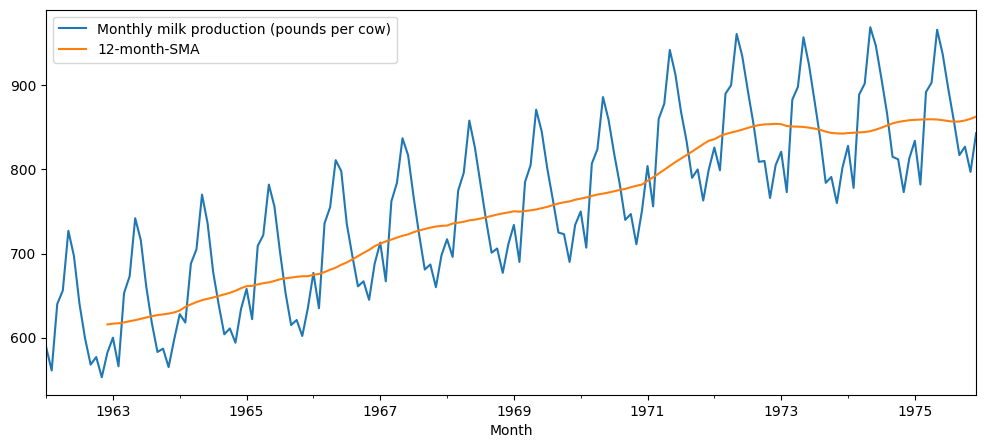

In [44]:
df['12-month-SMA'] = df['Monthly milk production (pounds per cow)'].rolling(window=12).mean()

df[['Monthly milk production (pounds per cow)','12-month-SMA']].plot(figsize=(12,5))

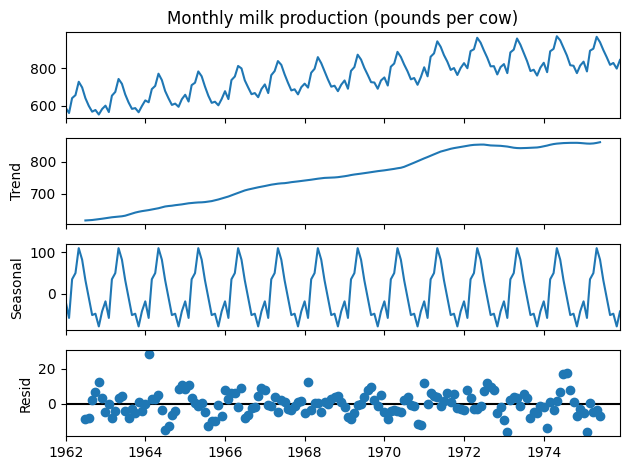

In [48]:
ssn= seasonal_decompose(df["Monthly milk production (pounds per cow)"], model='add')
ssn.plot()

In [49]:
train= df.iloc[:len(df)-12]
test= df.iloc[len(df)-12:]

In [68]:
train.index.freq = 'MS'
test.index.freq = 'MS'

In [77]:
smodel = auto_arima(train["Monthly milk production (pounds per cow)"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    start_Q=0,
                    max_P=3,
                    max_Q=3,
                    seasonal=True,
                    d=1,
                    D=1,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1038.780, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1003.108, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=988.167, Time=0.45 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1030.702, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=990.034, Time=0.71 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=989.984, Time=1.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1003.262, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=995.913, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=990.074, Time=0.56 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=990.012, Time=0.52 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=988.530, Time=0.43 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=991.974, Time=1.22 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=990.008, Time=0.61 sec

Best model:  ARIMA(0,1,1)(0,1,1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  156
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -491.084
Date:                            Tue, 02 Jul 2024   AIC                            988.167
Time:                                    15:58:55   BIC                            997.056
Sample:                                01-01-1962   HQIC                           991.779
                                     - 12-01-1974                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2579      0.080     -3.226      0.001      -0.415      -0.101
ma.S.L12      -0.6116      0.078     -7.855      0.000      -0.764      -0.459
sigma2        54.0912      5.334     10.141      0.000      43.637      64.545
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                36.67
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.79
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE= 10.84508637139559 

MSE= 117.61589840303036


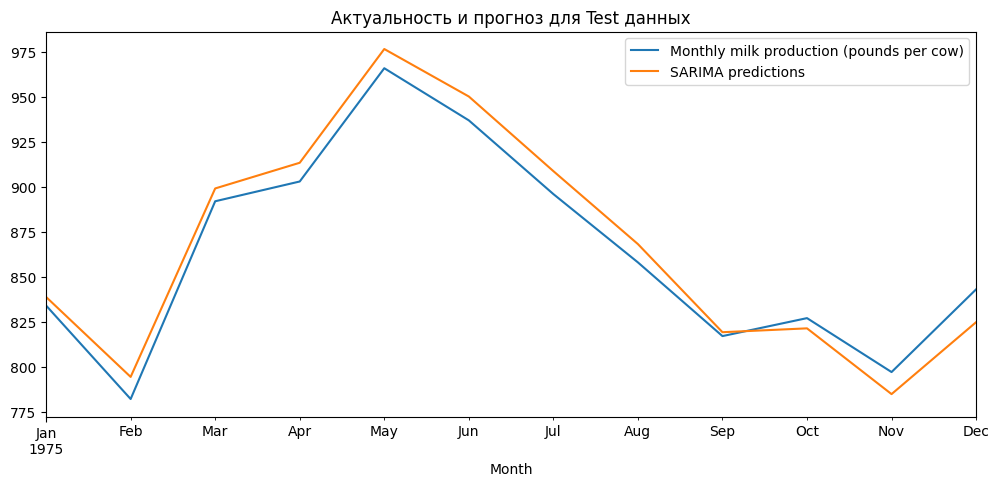

In [78]:
# обучим модель
sarima_model = SARIMAX(train["Monthly milk production (pounds per cow)"], order = (0,1,1), seasonal_order = (0,1,1,12))
sarima_model_fit = sarima_model.fit()

# сделаем пронозы на Test данных
start = len(train)
end = len(train) + len(test) - 1
pred = sarima_model_fit.predict(start=start, end=end, dynamic=False).rename("SARIMA predictions")

# построим прогноз
title = "Актуальность и прогноз для Test данных"
test["Monthly milk production (pounds per cow)"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse = mean_squared_error(test["Monthly milk production (pounds per cow)"],pred)
rmse_sarima = rmse(test["Monthly milk production (pounds per cow)"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

Файл № 2

In [83]:
url='https://drive.google.com/uc?id=1yfw6gcgmJXCtxkjC69ekUvsEtAiYTlST'
df = pd.read_csv(url).iloc[:, :]

In [84]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [85]:
df.index = pd.to_datetime(df['Month'])

<Axes: xlabel='Month'>

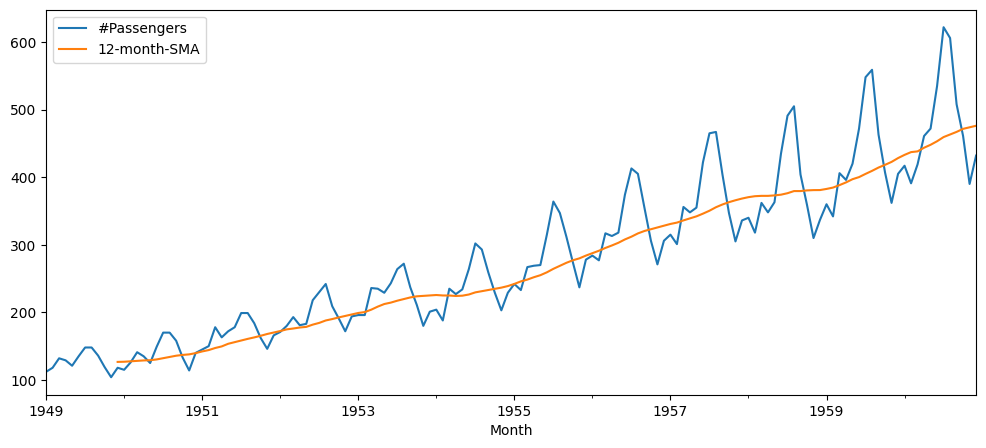

In [87]:
df['12-month-SMA'] = df['#Passengers'].rolling(window=12).mean()

df[['#Passengers','12-month-SMA']].plot(figsize=(12,5))

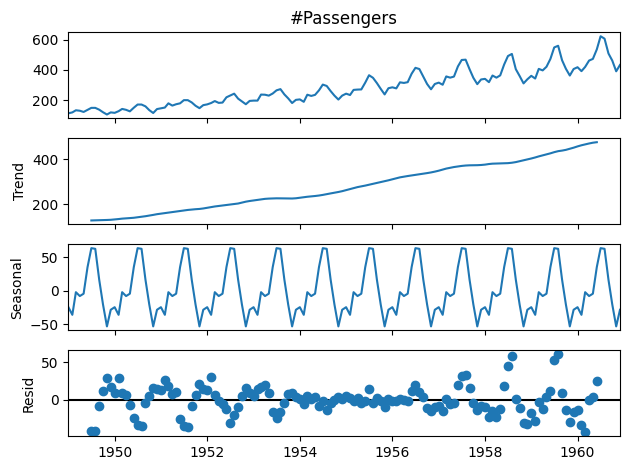

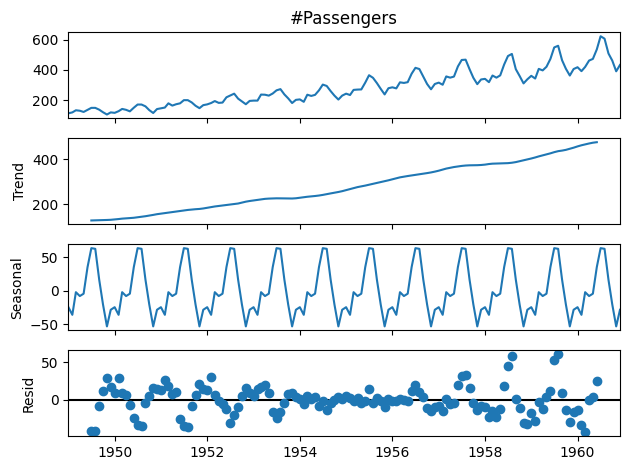

In [88]:
ssn= seasonal_decompose(df["#Passengers"], model='add')
ssn.plot()

In [89]:
train= df.iloc[:len(df)-12]
test= df.iloc[len(df)-12:]

In [90]:
train.index.freq = 'MS'
test.index.freq = 'MS'

In [94]:
smodel = auto_arima(train["#Passengers"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3,
                    m=12,
                    start_P=0,
                    start_Q=0,
                    max_P=3,
                    max_Q=3,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.82 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=1.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=2.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.82 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.65 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.56 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=1.08 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.38 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.81 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 02 Jul 2024   AIC                            905.686
Time:                                    18:04:03   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE= 17.81560143047715 

MSE= 317.39565432961956


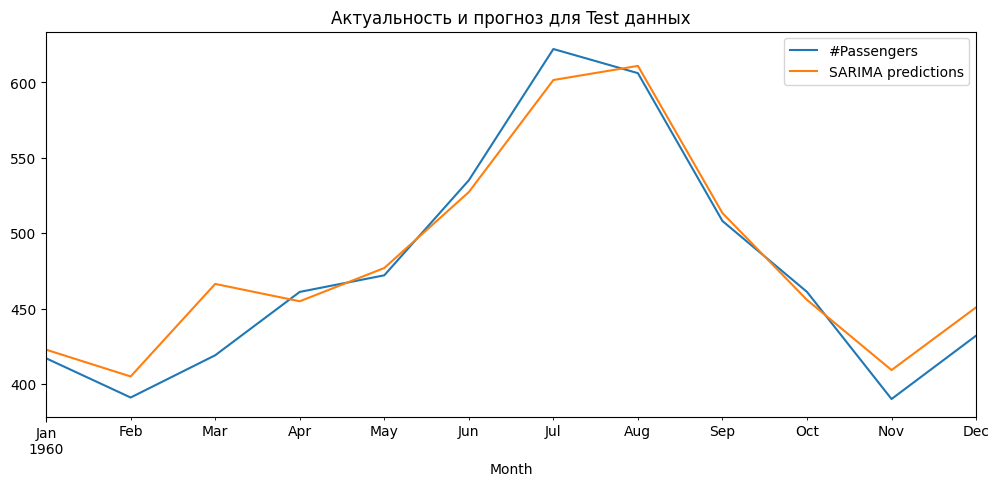

In [95]:
# обучим модель
sarima_model = SARIMAX(train["#Passengers"], order = (3,0,0), seasonal_order = (0,1,0,12))
sarima_model_fit = sarima_model.fit()

# сделаем пронозы на Test данных
start = len(train)
end = len(train) + len(test) - 1
pred = sarima_model_fit.predict(start=start, end=end, dynamic=False).rename("SARIMA predictions")

# построим прогноз
title = "Актуальность и прогноз для Test данных"
test["#Passengers"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse = mean_squared_error(test["#Passengers"],pred)
rmse_sarima = rmse(test["#Passengers"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")

Файл № 3

In [96]:
url='https://drive.google.com/uc?id=1wMwd2mV_nchXgaz3QTPSBl7Xd-ITsPVQ'
df = pd.read_csv(url).iloc[:, :]

In [97]:
df.head()

,date,people_employed
0,1978-01-01,5985.7
1,1978-02-01,6040.6
2,1978-03-01,6054.2
3,1978-04-01,6038.3
4,1978-05-01,6031.3


In [98]:
df.index = pd.to_datetime(df['date'])

<Axes: xlabel='date'>

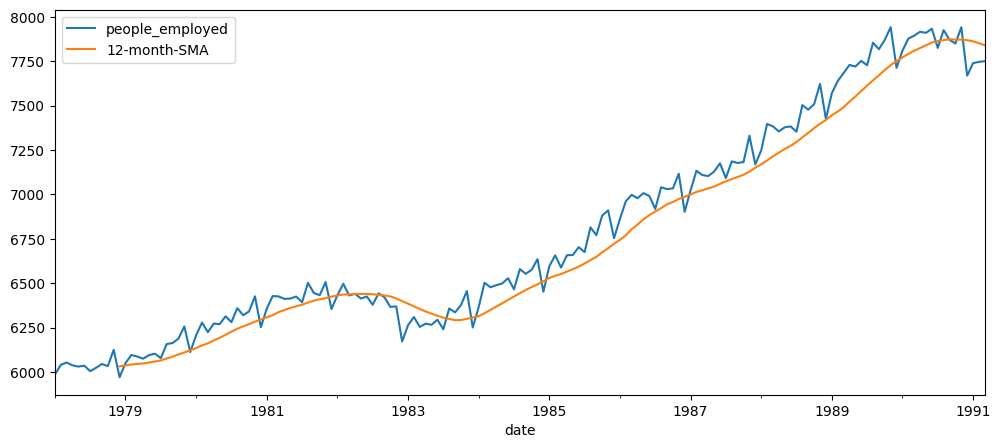

In [99]:
df['12-month-SMA'] = df['people_employed'].rolling(window=12).mean()

df[['people_employed','12-month-SMA']].plot(figsize=(12,5))

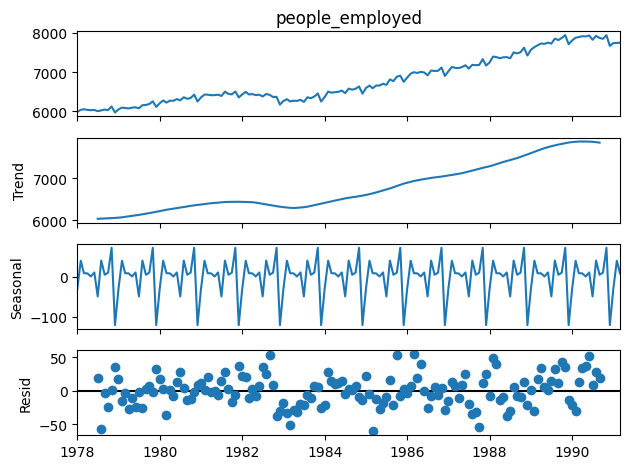

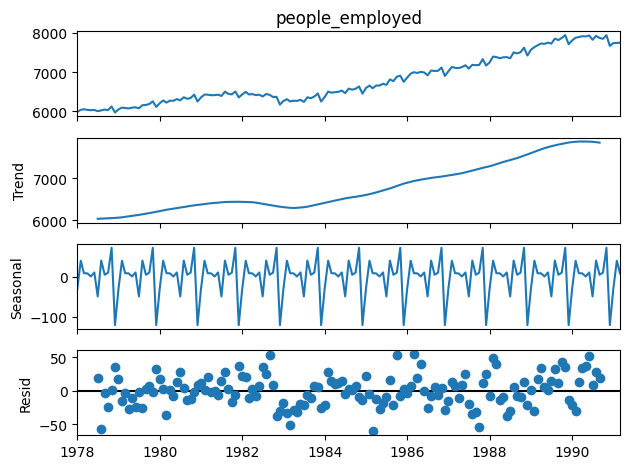

In [101]:
ssn= seasonal_decompose(df["people_employed"], model='add')
ssn.plot()

In [109]:
train= df.iloc[:len(df)-15]
test= df.iloc[len(df)-15:-3]

In [110]:
train.index.freq = 'MS'
test.index.freq = 'MS'

In [118]:
smodel = auto_arima(train["people_employed"],
                    start_p=0,
                    start_q=0,
                    max_p=6,
                    max_q=6,
                    m=12,
                    start_P=0,
                    start_Q=0,
                    max_P=6,
                    max_Q=6,
                    seasonal=True,
                    d=1,
                    D=1,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1338.096, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1304.886, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1290.173, Time=0.57 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1335.842, Time=0.29 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1291.989, Time=1.66 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1291.977, Time=3.64 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1305.523, Time=0.45 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1293.862, Time=2.65 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1291.382, Time=0.41 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1291.095, Time=0.96 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1288.651, Time=0.77 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1334.900, Time=0.21 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=1290.485, Time=1.49 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1290.474, Time=3.19 sec
 ARIMA(0,1,2)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -636.357
Date:                              Tue, 02 Jul 2024   AIC                           1282.713
Time:                                      18:14:36   BIC                           1297.089
Sample:                                  01-01-1978   HQIC                          1288.555
                                       - 12-01-1989                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8743      0.091      9.574      0.000       0.695       1.053
ma.L1         -1.1190      0.120     -9.345      0.000      -1.354      -0.884
ma.L2          0.3453      0.088      3.946      0.000       0.174       0.517
ma.S.L12      -0.7551      0.090     -8.357      0.000      -0.932      -0.578
sigma2       898.5908    112.727      7.971      0.000     677.649    1119.532
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.98   Prob(JB):                         0.63
Heteroskedasticity (H):               1.99   Skew:                             0.17
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE= 114.5017890535771 

MSE= 13110.65969646987


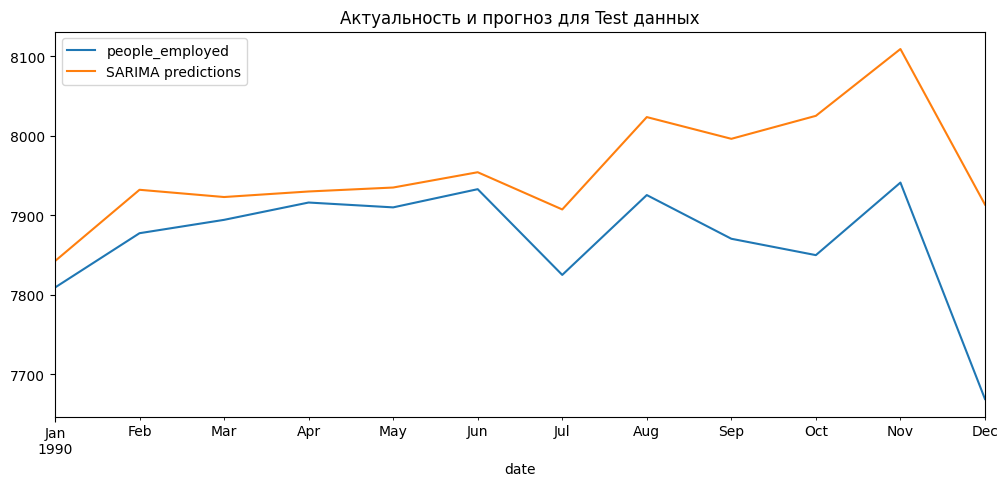

In [120]:
# обучим модель
sarima_model = SARIMAX(train["people_employed"], order = (1,1,2), seasonal_order = (0,1,1,12))
sarima_model_fit = sarima_model.fit()

# сделаем пронозы на Test данных
start = len(train)
end = len(train) + len(test) - 1
pred = sarima_model_fit.predict(start=start, end=end, dynamic=False).rename("SARIMA predictions")

# построим прогноз
title = "Актуальность и прогноз для Test данных"
test["people_employed"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)

# оценим модель
mse = mean_squared_error(test["people_employed"],pred)
rmse_sarima = rmse(test["people_employed"], pred)

print(f"RMSE= {rmse_sarima} \n")
print(f"MSE= {mse}")